In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df_movies = pd.read_csv('tmdb_movies.csv')
df_genres = pd.read_csv('tmdb_genres.csv')
top_rated_movies = df_movies[df_movies['vote_count'] > df_movies['vote_count'].quantile(0.75)]
top_10 = top_rated_movies.sort_values(by='vote_average', ascending=False).head(10)
top_10[['title', 'vote_average']]

,title,vote_average
1881,The Shawshank Redemption,8.5
3337,The Godfather,8.4
2294,Spirited Away,8.3
3865,Whiplash,8.3
2731,The Godfather: Part II,8.3
3232,Pulp Fiction,8.3
1818,Schindler's List,8.3
662,Fight Club,8.3
2170,Psycho,8.2
1847,GoodFellas,8.2


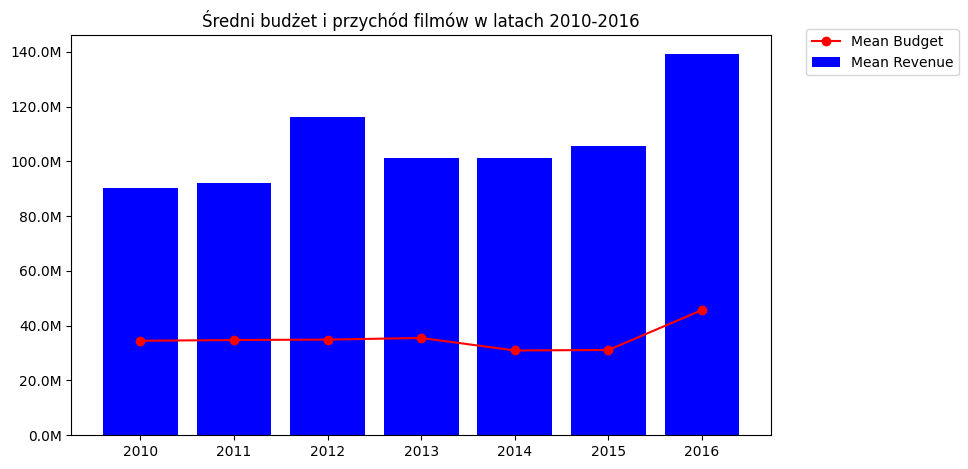

In [14]:
df_movies['release_year'] = pd.to_datetime(df_movies['release_date']).dt.year
filtered_movies = df_movies[(df_movies['release_year'] >= 2010) & (df_movies['release_year'] <= 2016)]
data = filtered_movies.groupby('release_year').agg({'revenue': 'mean', 'budget': 'mean'})


def milion(x, pos):
    return '{:2.1f}M'.format(x * 1e-6)


fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])
ax.bar(data.index, data['revenue'], color='blue', label='Mean Revenue')
ax.plot(data['budget'], color='red', marker='o', label='Mean Budget')
ax.yaxis.set_major_formatter(plt.FuncFormatter(milion))
ax.set_title('Średni budżet i przychód filmów w latach 2010-2016')
ax.legend(loc=(1.05, 0.90))

plt.show()

In [15]:
df_movies_genres = pd.merge(df_movies, df_genres, left_on='genre_id', right_index=True, how="inner",
                            validate="many_to_many")
df_movies_genres

,Unnamed: 0_x,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,release_year,Unnamed: 0_y,genres
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007.0,10749.0,Romance
8,8,250000000,http://harrypotter.warnerbros.com/harrypottera...,767,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,2009-07-07,933959197,153.0,Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,12.0,2009.0,10749.0,Romance
10,10,270000000,http://www.superman.com,1452,en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,2006-06-28,391081192,154.0,Released,NaN,Superman Returns,5.4,1400,12.0,2006.0,10749.0,Romance
11,11,200000000,http://www.mgm.com/view/movie/234/Quantum-of-S...,10764,en,Quantum of Solace,Quantum of Solace continues the adventures of ...,107.928811,2008-10-30,586090727,106.0,Released,"For love, for hate, for justice, for revenge.",Quantum of Solace,6.1,2965,12.0,2008.0,10749.0,Romance
12,12,200000000,http://disney.go.com/disneypictures/pirates/,58,en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,2006-06-20,1065659812,151.0,Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246,12.0,2006.0,10749.0,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,4785,0,NaN,287625,en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,2014-09-05,0,60.0,Released,NaN,Stories of Our Lives,0.0,0,18.0,2014.0,10770.0,TV Movie
4789,4789,0,NaN,39851,en,Clean,"After losing her husband to a heroin overdose,...",1.464566,2004-09-01,0,111.0,Released,"When you don't have a choice, you change.",Clean,6.7,17,18.0,2004.0,10770.0,TV Movie
4790,4790,0,NaN,13898,fa,دایره,Various women struggle to function in the oppr...,1.193779,2000-09-08,0,90.0,Released,NaN,The Circle,6.6,17,18.0,2000.0,10770.0,TV Movie
4793,4793,0,NaN,182291,en,On The Downlow,Isaac and Angel are two young Latinos involved...,0.029757,2004-04-11,0,90.0,Released,Two gangs. One secret. One crossroad.,On The Downlow,6.0,2,18.0,2004.0,10770.0,TV Movie


In [16]:
most_of_genre = df_movies_genres['genres'].value_counts().idxmax()
amout = {most_of_genre: df_movies_genres['genres'].value_counts().max()}
amout

{'TV Movie': 1207}

In [17]:
avarage_runtime = df_movies_genres.groupby('genres')['runtime'].mean()
longest_runtime = {avarage_runtime.idxmax(): avarage_runtime.max()}
longest_runtime

{'TV Movie': 115.52155887230514}

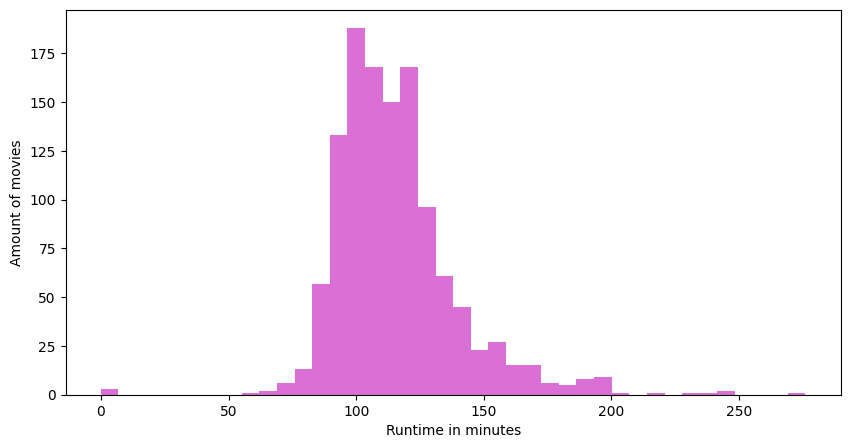

In [32]:
longest_genre = df_movies_genres[
    df_movies_genres['genres'] == next(iter(longest_runtime))]
plt.figure(figsize=(10, 5))
plt.hist(longest_genre['runtime'], color='orchid', bins=40)
plt.xlabel('Runtime in minutes')
plt.ylabel('Amount of movies')
plt.show()